# Moteur de recommendations de films - Partie 2 :
## 1-METHODE COSINE POUR LES KEYWORDS 
## 2-DISTANCES :RECOMANDATIONS
## 3-KNN
## 4-K-MEANS
## 5- CHA
## 6- API FLASK 

### INTRODUCTION 
### On a étudié dans la premiére partie le dataset de film. j'ai commencé par la préparation de données.maintenant on va traiter  les différentes manières de faire une classification de nos données, affin de recommander à un utilisateur 5 films similaires au film demandé. et choisir celle qui nous semble la plus pertinente.

In [160]:
# IMPORTR LES DONNÉES
import pandas as pd
import numpy as np

data_feautures1 = pd.read_csv('data_feautures1.csv')
data=pd.read_csv('data.csv')
data_feautures1.drop(['Unnamed: 0'],axis=1,inplace=True)

## 1- SCORE DE SIMILARITÉ baser sur cosine et key words (methode cosine) : 

In [85]:
#SCORE DE SIMILARITÉ baser sur cosine et key words 
data['plot_keywords']=data['plot_keywords'].str.replace('|',',')
data[['plot_keywords']] = data[['plot_keywords']].fillna('')
#Dans sa forme actuelle, il n'est pas possible de calculer la similarité entre deux aperçus. 
#Pour ce faire, on doit calculer les vecteurs de mots de chaque aperçu ou document,
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(data['plot_keywords'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

#Construct a reverse map of indices and movie titles
indices = pd.Series(data.index, index=data.index).drop_duplicates()
indices = pd.Series(data['plot_keywords'].index, index=data['plot_keywords'].index).drop_duplicates()
# CETTE fonction sort les plus similairesfilm par rapport a leur popularités et similarité 


def get_recommendations_10films_keywords(k, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[k]
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data[['movie_title']].iloc[movie_indices]

get_recommendations_10films_keywords(192)

,movie_title
29,X-Men: The Last Stand
486,X-Men
56,X-Men: Apocalypse
89,X-Men: First Class
4073,The Spectacular Now


# 2-ANALYSE (METHODE COSINE) : 
## 2- 3 AVEC LA METHODE COSINE QUI CALCULE LA SIMILARITÉ ENTRE LES VARIABLES QUALITATIVES, JE VOULAIS L'ITULISER POUR AVOIR UNE PREMIÉRE RECOMMANDATION JUSTE POUR SE PLACER ET AVOIR DES IDÉÉS PARCEQUE ON PEUT PAS RESTER JUSTE ICI IL FAUT VOIR PAR RAPPORT LES AUTRES VARIABLES 

# 3 - Distances

# 3 - 1 Manhattan

In [92]:
from sklearn.neighbors import DistanceMetric
dist_manhattan = DistanceMetric.get_metric('manhattan')
manhattan = dist_manhattan.pairwise(data_feautures1)

# 3 - 2 Euclidean

In [93]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('euclidean')
euclidian = dist.pairwise(data_feautures1)

# 3 - 3 Chebyshev

In [94]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('chebyshev')
chebyshev = dist.pairwise(data_feautures1)

# 3 - 4 Minkowski

In [95]:
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('minkowski', p = 10)
minkowski = dist.pairwise(data_feautures1)

# 3 - 5 Comparaison de distances

In [96]:
for i in range(0,len(euclidian)):
    euclidian[i,i] = 10000
    manhattan[i,i] = 10000
    chebyshev[i,i] = 10000
    minkowski[i,i] = 10000
    
euclidian = movie_title.values[np.argmin(euclidian, axis = 0)].astype(str)
manhattan = movie_title.values[np.argmin(manhattan, axis = 0)].astype(str)
chebyshev = movie_title.values[np.argmin(chebyshev, axis = 0)].astype(str)
minkowski = movie_title.values[np.argmin(minkowski, axis = 0)].astype(str)

values1 = np.concatenate((euclidian, manhattan, chebyshev, minkowski), axis = 1)
index1 = movie_title.values
columns1 = ['euclidian', 'manhattan', 'chebyshev', 'minkowski']
result1 = pd.DataFrame(values1, index = index1, columns = columns1)

print(result1[10:16])

                                                                                   euclidian  \
(Superman Returns ,)                                     Batman v Superman: Dawn of Justice    
(Quantum of Solace ,)                            Pirates of the Caribbean: Dead Man's Chest    
(Pirates of the Caribbean: Dead Man's Chest ,)                              The Lone Ranger    
(The Lone Ranger ,)                              Pirates of the Caribbean: Dead Man's Chest    
(Man of Steel ,)                                Pirates of the Caribbean: On Stranger Tides    
(The Chronicles of Narnia: Prince Caspian ,)    Pirates of the Caribbean: On Stranger Tides    

                                                                                   manhattan  \
(Superman Returns ,)                                     Batman v Superman: Dawn of Justice    
(Quantum of Solace ,)                                    Batman v Superman: Dawn of Justice    
(Pirates of the Caribbean: Dead Man's C

# 4 LES VERITÉES TERRAINS (EVALUATION) :
## Avant de passer aux autres algorithmes je preferes de construire 3 verité terrain(des recommandations exemplaires)pour pouvoir evaluer mes resultats de recommandations pour chaque methodes : KNN , K-mean, CHA.


## Model : des films de superheros qu'ils sont proches entre eux 
#### id 27 Titre : Spider-Man 2
#### id 19 Titre : PThe Amazing Spider-Man
#### id 10 Titre : Superman Returns
#### id 16 Titre : Batman v Superman: Dawn of Justice
#### id 28 Titre : Iron Man 3

### Model_true1 = [27,19,10,16,28]

## Mode2 : des series de films de Harry Potter 
#### id 177 Titre : Harry Potter and the Prisoner of Azkaban
#### id 260 Titre : Harry Potter and the Chamber of Secrets
#### id 102 Titre : Harry Potter and the Goblet of Fire 
#### id 101 Titre : Harry Potter and the Order of the Phoenix
#### id 8 Titre : Harry Potter and the Half-Blood Prince 

### Model_true2 = [177,260,102,101,8]

## Mode3 : series de film X_Men
#### id 29 Titre : X-Men: The Last Stand
#### id 192 Titre : X-Men 2 
#### id 110 Titre : X-Men Origins: Wolverine
#### id 218 Titre : The Wolverine
#### id 486 Titre : X-Men

### Model_true3 = [29,192,110,218,486]


#  5-  RECOMMANDATION PAR K NearestNeighbors (KNN)

In [161]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(data_feautures1)
distances1, indices1 = nbrs.kneighbors(data_feautures1)


In [162]:
def print_similar_films_KNnN(query=None,id=None):
    if id:
        for id in indices1[id][1:]:
            print(data.ix[id]['movie_title'])
    if query:
        found_id = get_index_from_name(query)
        for id in indices1[found_id][1:]:
            print(data.ix[id]['movie_title'])

## 5-1 Recommandation : 

In [165]:
#je choisi un ID aleatoire
print_similar_films_KNnN(id=192)

X-Men: The Last Stand 
X-Men Origins: Wolverine 
The Wolverine 
Mortal Kombat: Annihilation 
The Omega Code 


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [175]:
#je vais evaluer notre algorithme par rapport aux vérité terrain 1,2,3

Model_true1 = [27,19,10,16,28]
Model_true2 = [177,260,102,101,8]
Model_true3 = [29,192,110,218,486]

a=0
b=0
c=0
for i in indices1[192][1:]:
    for j in Model_true1:
        if j==i:
            a=a+1
    for k in Model_true2:
        if k==i:
            b=b+1
    for n in Model_true3:
        if n==i:
            c=c+1

tauxmatching_knn=(a/5+b/5+c/5)/3
print(tauxmatching_knn*100,"%")

20.0 %


# 5-2 Taux de maching KNN = 20%

# 6- K-MEAN :
## 6-2 Opérations : 
##  - Choix de nombre de clusters,on observe l'inertie de notre algorithme ou le wcss (Within     Cluster Sum of Squares)(methode coude)
## -je prefere etre pragmatique avec un choix d'un petit nombre de clusters j'aurai trop d'individu dans le meme cluster de preference d'itiluser l'intuition et de choisir un nombre qui va nous donner des clusters avec des nombres pas trop grandes
# -j'ai fait plusieurs essai pour decouper mon dendograme 
## -pour trouver un nombre moyen d'individus dans chaque clusters qui est proche de 5
## -j'ai reparti mes individus sur 800 clusters(avec 800 je vais avoir des clusters avec au moyen 6 films : je voulais pas decouper encore plus parceque sinon je vais avoir des clusters avec juste un seul film ) cependant j'ai des clusters qui contienne plus que 5 et aussi des clusters avec moins de 5
## -j'ai itulisé le KNN pour avoir les film les plus proches dans les clusters avec plus de 6 films
## - j'ai gardé les clusters qui contienne moins de 6 films comme ils sont 

## 6-2 Methode habituelle pour choisir le nombre de clusters (methode de coude)representation de l'evolution de l'inertie intra clusters

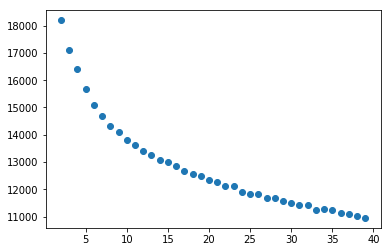

In [180]:
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline
a=[]
for i in range(2,40):
    kmeans = cluster.KMeans(n_clusters=i) 
    kmeans.fit(data_feautures1) 
    a.append(kmeans.inertia_)
plt.scatter(range(2,40),a)

## 6-2 d'apres la methode de 'coude'de voir la cassure pour choisir le nombre de clusters est n'est pas valable pour notre probleme,parce que on va avoir k_clusters = 4 ce qui implique un grand nombre moyen de film par clusters 
## - Comment peut on trouver le bon nombre de clusters:
## -On doit etre pragmatique,on sait qu'on veut idéalement des clusters qui contient 6 films,pour les recommandeés
## -j'ai trouvé que le bon numbre de clusters apres plusieurs essais est 800,avec au moyen un peu pres 7 films par clusters
## - Probleme ;il y'aura des clusters avec moins de 6 films et d'autres avec plus de 6 film
## - Solution itulisation de KNN pour les clusters avec plus de 6 films pour recommander les 5 plus proches,et garder les clusters inferieure ou egale 6
## - Inconvenient avoir des recommandations avec moins de 5 films

In [181]:
# Classification par K-Means
kmeans = cluster.KMeans(n_clusters=800) 
kmeans.fit(data_feautures1) 
#index triés des groupes 
idk = np.argsort(kmeans.labels_) 
gdf=data_feautures1.iloc[idk]
gdf['id']=idk
gdf['movies']=data_feautures1.index[idk]
gdf['groupe']=kmeans.labels_[idk]
df=gdf.groupby(['groupe']).count()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

# 6-2 K-MEAN RECOMMANDATION

In [182]:
def Recom_K_mean(id):
    ali=data_feautures1.iloc[kmeans.labels_[idk]==kmeans.labels_[idk][id]]
    if len(ali)>6:
        from sklearn.neighbors import NearestNeighbors
        nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(ali)
    
        distances_ny, indices_ny = nbrs.kneighbors(ali)
    
        datat1=pd.DataFrame(indices_ny)
        datat1.index=ali.index
    
        print(data['movie_title'].iloc[datat1.loc[id][1:]])
    else:
        print(data['movie_title'][ali.index])

In [183]:
Recom_K_mean(192)

13                             The Lone Ranger 
10                            Superman Returns 
1     Pirates of the Caribbean: At World's End 
0                                       Avatar 
3                        The Dark Knight Rises 
Name: movie_title, dtype: object


#  6-3 Évaluation k-MEANS

#  - Pour l’évaluation , je choisis de calculer le taux de matching entre les resultat que je vais avoir comme recommandation et les veritées terrains que j'ai construit. :
# - Taux de matching k_mean = 0% pour une recommandation aleatoire pour le ID = 192

In [184]:
#je vais evaluer notre algorithme par rapport aux vérité terrain 1,2,3

Model_true1 = [27,19,10,16,28]
Model_true2 = [177,260,102,101,8]
Model_true3 = [29,192,110,218,486]
model_recom_kmean_id_192=[44,36,51,25,26]

a=0
b=0
c=0
for i in model_recom_kmean_id_192:
    for j in Model_true1:
        if j==i:
            a=a+1
    for k in Model_true2:
        if k==i:
            b=b+1
    for n in Model_true3:
        if n==i:
            c=c+1

tauxmatching_kmean=(a/5+b/5+c/5)/3
print(tauxmatching_kmean*100,"%")

0.0 %


# 6-4 - Taux de matching k_mean = 0% pour une recommandation aleatoire pour le ID = 192

# 7 - CHA : 
## 7-1 Operation :
## j'ai fait plusieurs essai pour decouper mon dendograme 
## pour trouver un nombre moyen d'individus dans chaque clusters qui est proche de 5
## j'ai reparti mes individus sur 616 clusters(avec 616 je vais avoir des clusters avec au moyen 7 films : je voulais pas decouper encore plus parceque sinon je vais avoir des clusters avec juste un seul film ) cependant j'ai des clusters qui contienne plus que 5 et aussi des clusters avec moins de 5
## j'ai itulisé le KNN pour avoir les film les plus proches dans les clusters avec plus de 6 films
## j'ai gardé les clusters qui contienne moins de 6 films comme ils sont 


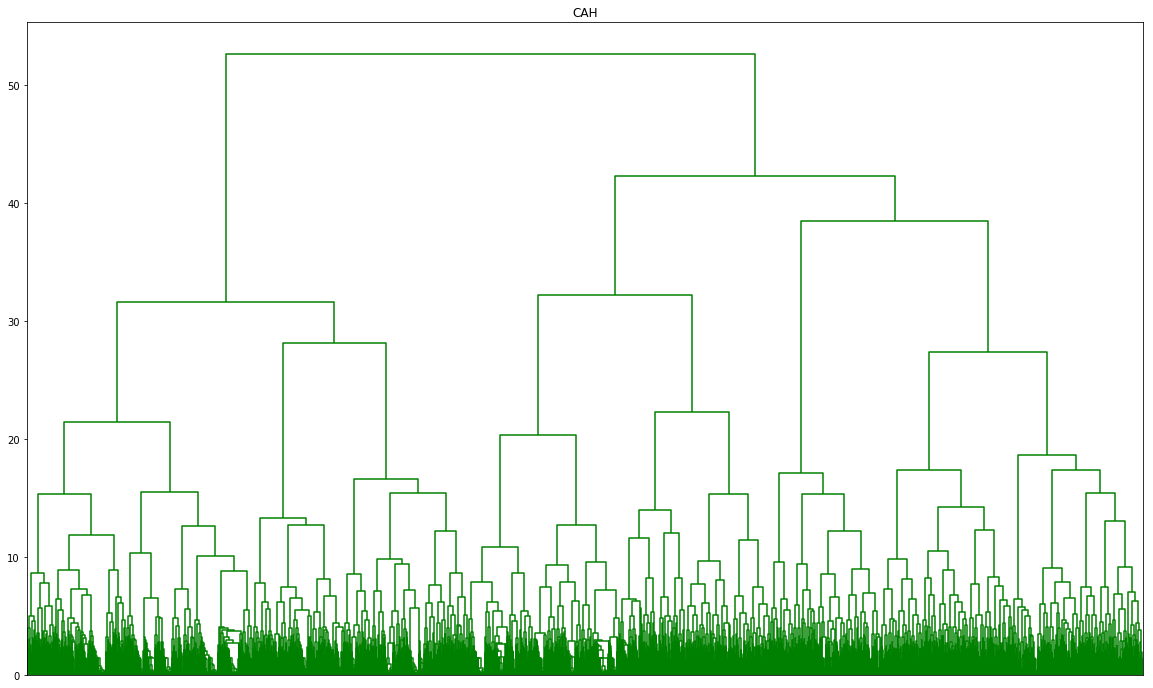

616 groupes constitués


In [185]:
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage 
import scipy.cluster.hierarchy as sch

%matplotlib inline

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)


#générer la matrice des liens 
Z = linkage(data_feautures1,method='ward',metric='euclidean') 

# génération et affichage du dendrogramme

plt.figure(figsize=(20,12))
plt.title("CAH") 

dendrogram(Z,labels=data_feautures1.index,no_labels=True,color_threshold=1200)

plt.show() 
groupes_cah = sch.fcluster(Z,t=3,criterion='distance') 
print(np.unique(groupes_cah).size, "groupes constitués")


In [186]:
#Affichage des groupes
idg = np.argsort(groupes_cah) 

gdf1=data_feautures1.iloc[idg]
gdf1['groupe']=groupes_cah[idg]

df1=gdf1.groupby(['groupe']).count()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


# 7-2 RECOMMANDATION CHA :

In [187]:
def similar_sam_classe_CHA(id):
    alif1=data_feautures1.iloc[groupes_cah[idg]==groupes_cah[idg][id]]
    if len(alif1)>6:
        from sklearn.neighbors import NearestNeighbors
        nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(alif1)
        distances_nX, indices_nX = nbrs.kneighbors(alif1)
        datat=pd.DataFrame(indices_nX)
        datat.index=alif1.index
        print(data['movie_title'].iloc[datat.loc[id][1:]])
    else:
        print(data['movie_title'][alif1.index])

In [188]:
similar_sam_classe_CHA(192)

191                                 Rio 2 
192                               X-Men 2 
193                             Fast Five 
194    Sherlock Holmes: A Game of Shadows 
195                      The 13th Warrior 
Name: movie_title, dtype: object


# 7-3 Evaluation d'algorithmes (matching avec les veritées terrains)
## 7-3-1- Évaluation CHA

##  7-3- 2- Pour l’évaluation , je choisis de calculer le taux de matching entre les resultat que je vais avoir comme recommandation et les veritées terrains que j'ai construit. :


In [189]:
#je vais evaluer notre algorithme par rapport aux vérité terrain 1,2,3

Model_true1 = [27,19,10,16,28]
Model_true2 = [177,260,102,101,8]
Model_true3 = [29,192,110,218,486]
model_recom_CHA=[191,192,193,194,195]

a=0
b=0
c=0
for i in model_recom_CHA:
    for j in Model_true1:
        if j==i:
            a=a+1
    for k in Model_true2:
        if k==i:
            b=b+1
    for n in Model_true3:
        if n==i:
            c=c+1

tauxmatching_CHA=(a/5+b/5+c/5)/3
print(tauxmatching_CHA*100,"%")

6.666666666666667 %


## 7-3-3- Taux de matching CHA = 6.66% pour une recommandation aleatoire pour le ID = 192

# 8 - Synthése : 
# Meilleur methode : apres la comparaison entre les methodes KNN ,CHA K-mean, le taux de matching moyen de la knn est le plus grand(20%).
# Methode choisi KNN

# 9 - FLASK API : Recommender 
### Creation de l'api sur flask. 
### Sur la page d'accueil une liste des film avec les "id" à choisir. 
### recherche lancée, le serveur cherche les 5 points les plus proches basés sur les résultats K-MEANS  
### retourne ces données à un template pour l'affichage.
### Le site est disponible à cette adresse : http://agrandik.pythonanywhere.com/